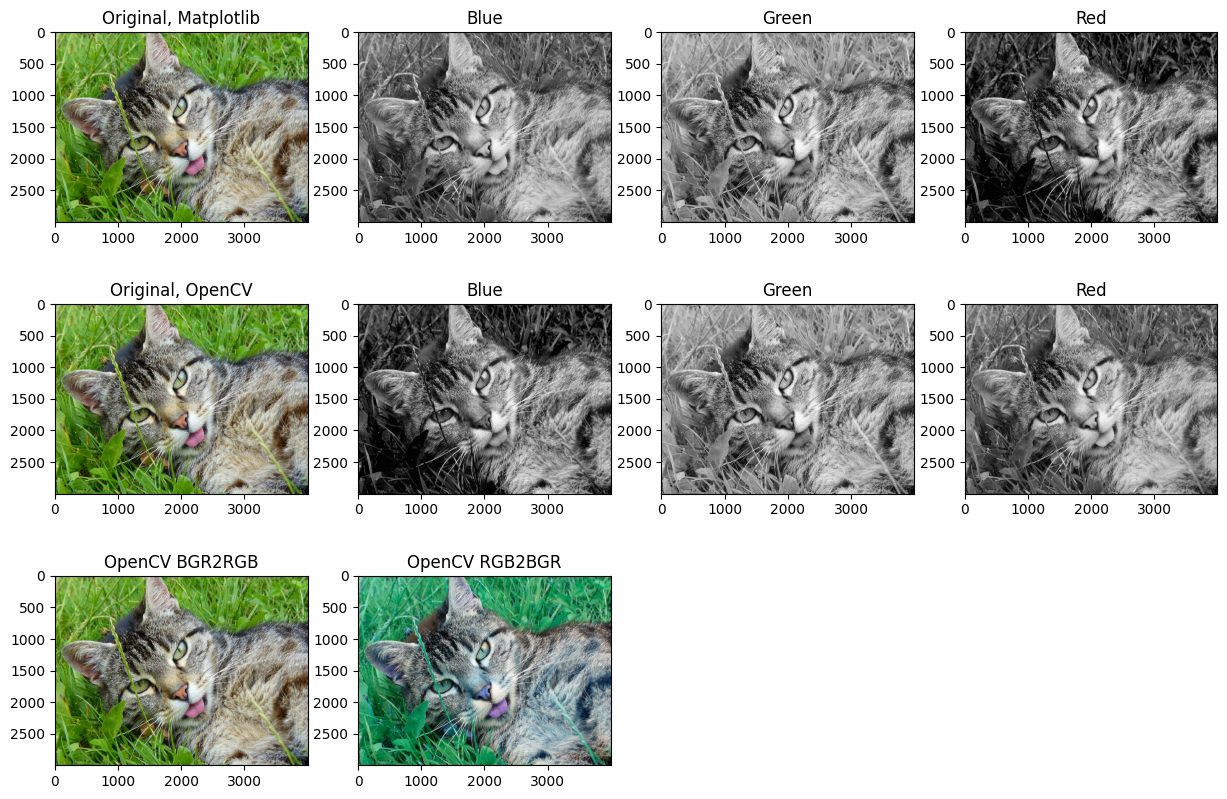

In [1]:
#Lab 1.1.1 : Image Color Order with different libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
imgplot = mpimg.imread('cat.jpg')
imgcv = cv2.imread('cat.jpg')

imgcv[:,:,0]#Blue
imgcv[:,:,1]#Green
imgcv[:,:,2]#Red

imgplot[:,:,0]#Blue
imgplot[:,:,1]#Green
imgplot[:,:,2]#Red

rows = 3
cols = 4

fig = plt.figure(figsize=(15,10))

fig.add_subplot(rows,cols,1)
showimg = imgplot[:,:,:]
plt.imshow(showimg)
plt.title('Original, Matplotlib')

fig.add_subplot(rows,cols,2)
showimg = imgplot[:,:,0]
plt.imshow(showimg, cmap='gray')
plt.title('Blue')

fig.add_subplot(rows,cols,3)
showimg = imgplot[:,:,1]
plt.imshow(showimg, cmap='gray')
plt.title('Green')

fig.add_subplot(rows,cols,4)
showimg = imgplot[:,:,2]
plt.imshow(showimg, cmap='gray')
plt.title('Red')

fig.add_subplot(rows,cols,5)
showimg = imgcv[:,:,::-1]
plt.imshow(showimg)
plt.title('Original, OpenCV')

fig.add_subplot(rows,cols,6)
showimg = imgcv[:,:,0]
plt.imshow(showimg, cmap='gray')
plt.title('Blue')

fig.add_subplot(rows,cols,7)
showimg = imgcv[:,:,1]
plt.imshow(showimg, cmap='gray')
plt.title('Green')

fig.add_subplot(rows,cols,8)
showimg = imgcv[:,:,2]
plt.imshow(showimg, cmap='gray')
plt.title('Red')

fig.add_subplot(rows,cols,9)
dst = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.title('OpenCV BGR2RGB')

fig.add_subplot(rows,cols,10)
plt.imshow(imgcv)
plt.title('OpenCV RGB2BGR')

plt.show()

Shape ของภาพ RGB: (3000, 4000, 3)


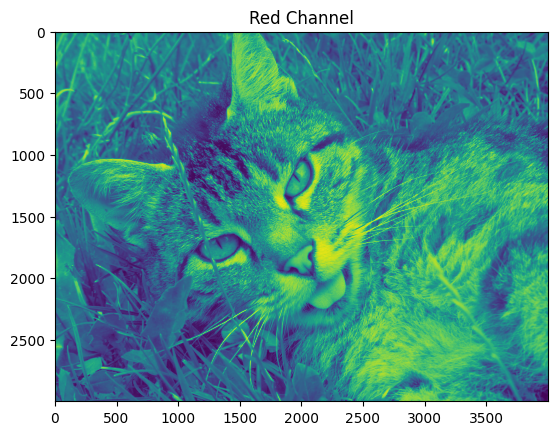

Shape ของภาพ Transpose (3, 4000, 3000)
Shape ของภาพ Moveaxis (3, 3000, 4000)
Shape ของภาพ R_reshape (3, 3000, 4000)


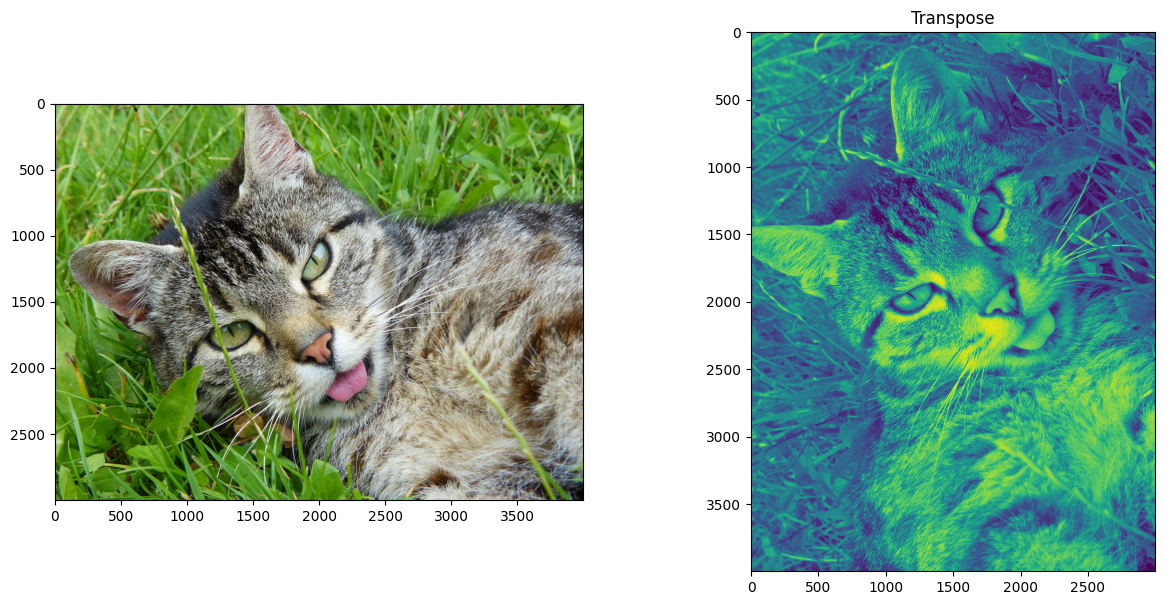

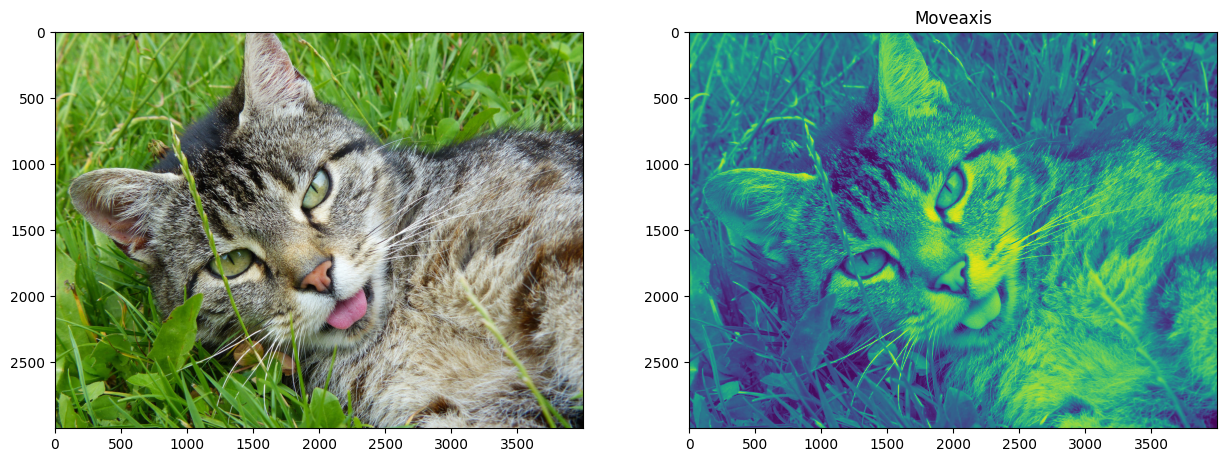

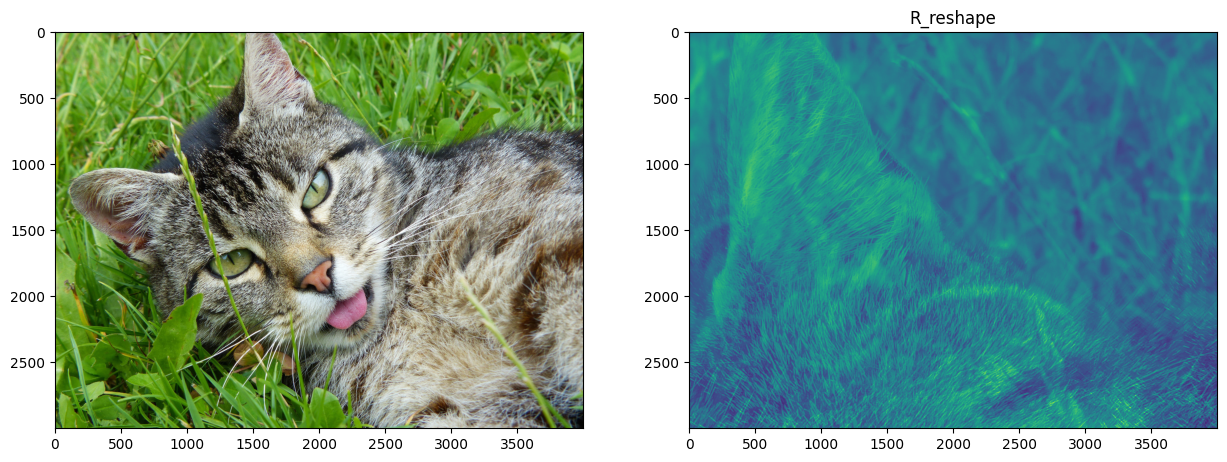

In [3]:
#1.1.2 : Image Reshape
#1.แสดง Shape ของภาพ RGB
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

imgplot = mpimg.imread('cat.jpg')

print("Shape ของภาพ RGB:", imgplot.shape)

#2.แสดง Shade สีแดง
xr =  imgplot[:,:,0]
plt.imshow(xr)
plt.title('Red Channel')
# print(xr)
plt.show()

#3.แสดง Shape ของภาพผลลัพธ์
# Transpose
transpose_img = np.transpose(imgplot, (2, 1, 0))
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(imgplot)
axs[1].imshow(transpose_img[0,:,:])
axs[1].set_title('Transpose')
print("Shape ของภาพ Transpose", transpose_img.shape)

# Move axis
moveaxis_img = np.moveaxis(imgplot, 2, 0)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(imgplot)
axs[1].imshow(moveaxis_img[0,:,:])
axs[1].set_title('Moveaxis')
print("Shape ของภาพ Moveaxis", moveaxis_img.shape)

# R_reshape
R_reshape = imgplot.reshape((3, 3000, 4000))
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(imgplot)
axs[1].imshow(R_reshape[0,:,:])
axs[1].set_title('R_reshape')
print("Shape ของภาพ R_reshape", R_reshape.shape)

(255, 255)


Text(0.5, 1.0, 'Reduce Bit Depth Using Quantization')

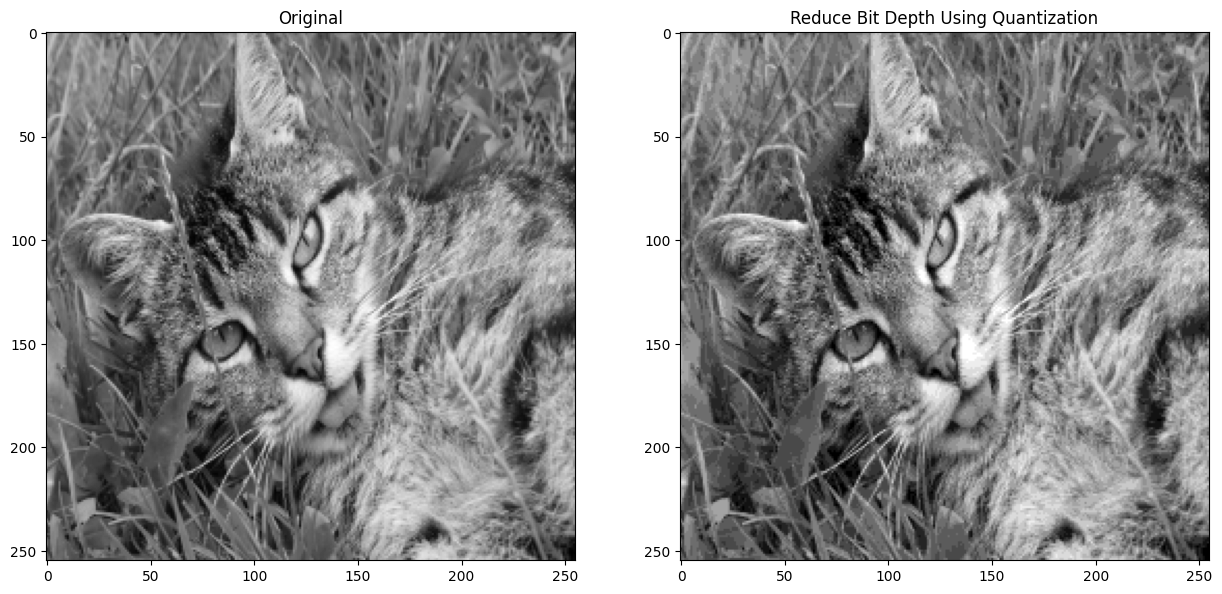

In [10]:
#1.1.3 : Reduce Bit Depth Using Quantization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

imgplot = mpimg.imread('cat.jpg')
original_img = mpimg.imread('cat.jpg')
imgplot = cv2.cvtColor(imgplot, cv2.COLOR_BGR2GRAY)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
new_size = (255, 255)
reducesize = cv2.resize(imgplot, new_size, interpolation = cv2.INTER_AREA)
original_reducesize = cv2.resize(original_img, new_size, interpolation = cv2.INTER_AREA)

qlevel = 4**2
smax = 255
smin = 0

print(reducesize.shape)

for i in range(reducesize.shape[1]):
    for j in range(reducesize.shape[0]):
        si = reducesize[j,i]
        q = (si - smin) / (smax - smin)
        quality = int(q * (qlevel - 1))
        reducesize[j, i] = quality

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(original_reducesize, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(reducesize, cmap='gray')
axs[1].set_title('Reduce Bit Depth Using Quantization')

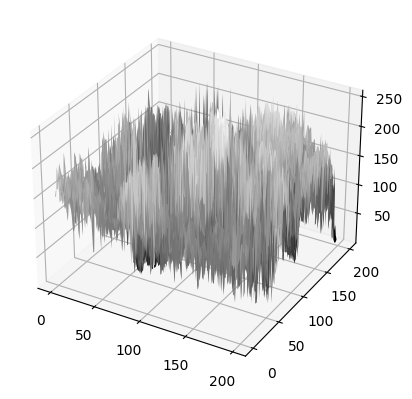

<Figure size 640x480 with 0 Axes>

In [7]:
#1.1.4 : 3D Image Surface
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

gray_image = cv2.imread("cat.jpg", cv2.IMREAD_GRAYSCALE)

reduce_width = 200
reduce_height = 200
resized_image = cv2.resize(gray_image, (reduce_width, reduce_height))
x_coords, y_coords = np.meshgrid(np.arange(reduce_width), np.arange(reduce_height))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x_coords, y_coords, resized_image, cmap='gray')
# ax.view_init(azim=0, elev=90)
plt.figure()
plt.show()